In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import plotly.express as px
import scipy.stats as stats

In [79]:
energy = pd.read_csv("energy.csv")
energy['Error'] = energy.apply(lambda row: (row.Total-energy['Total'][0])/energy['Total'][0], axis=1)

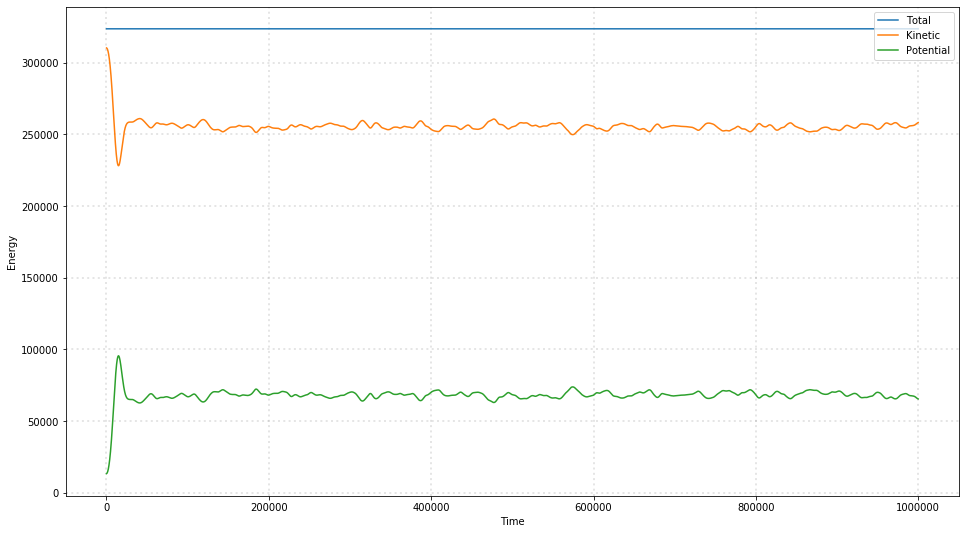

In [80]:
plt.plot(energy['t'], energy['Total'], label = 'Total')
plt.plot(energy['t'], energy['Kinetic'], label = 'Kinetic' )
plt.plot(energy['t'], energy['Potential'], label = 'Potential')
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend(loc="upper right")
plt.show()

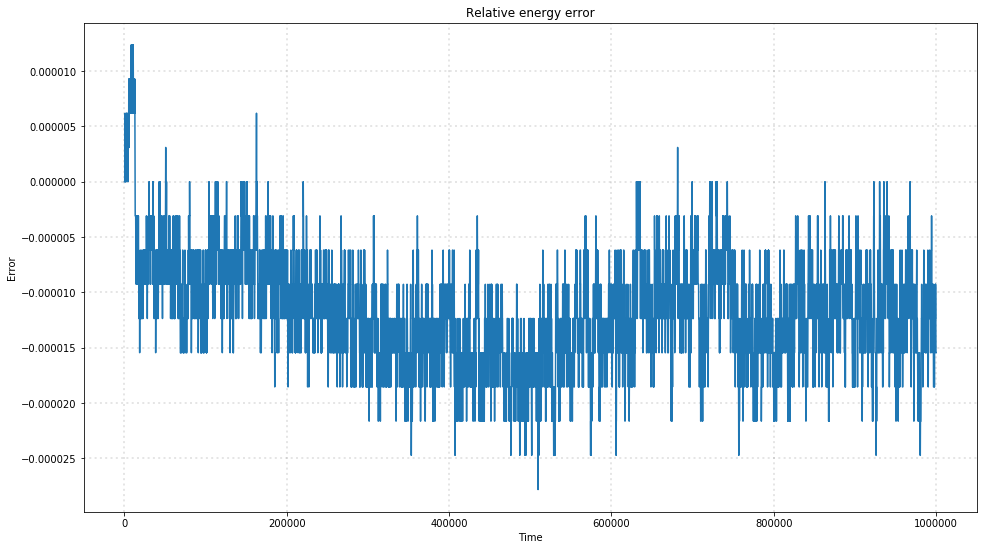

In [81]:
plt.plot(energy['t'], energy['Error'])
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Relative energy error")
plt.show()

In [82]:
df = pd.read_csv("relaxed.dat", sep=' ', names= ['x','y','z','vx','vy','vz','1','2','3','4','5','6','7','8'])
del df['1'], df['2'], df['3'], df['4'], df['5'], df['6'], df['7'], df['8']

In [83]:
df['v'] = df.apply(lambda row: np.sqrt(row.vx*row.vx+row.vy*row.vy+row.vz*row.vz), axis=1)

Text(0.5, 1.0, 'v')

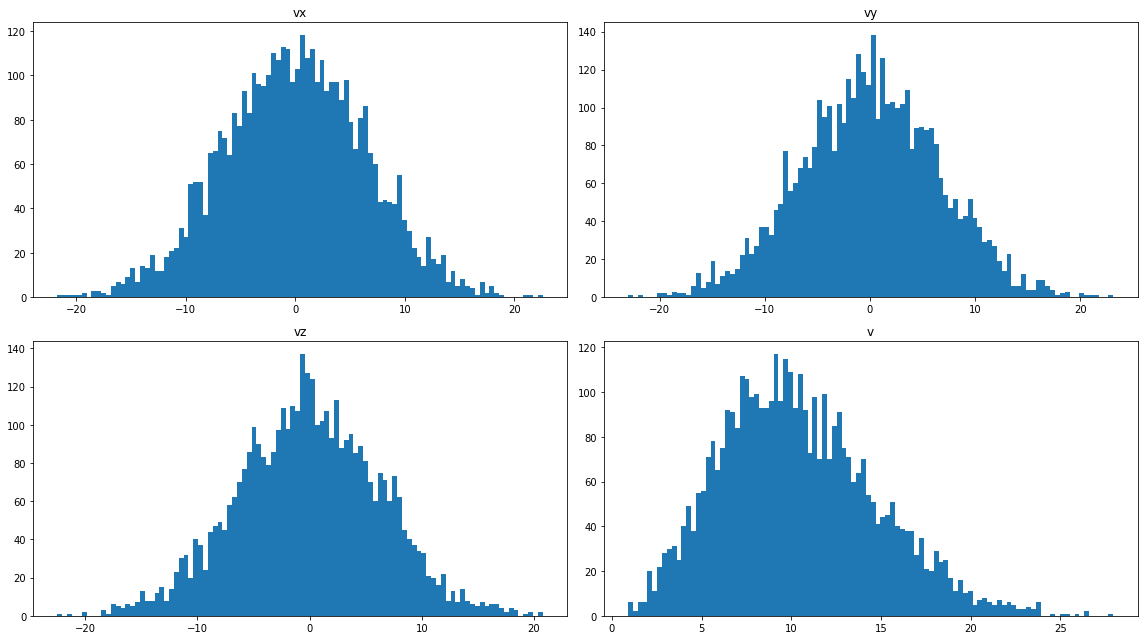

In [84]:
fig, axs = plt.subplots(2, 2, tight_layout=True)
axs[0, 0].hist(df['vx'], bins=100)
axs[0, 0].set_title("vx")
axs[0, 1].hist(df['vy'], bins=100)
axs[0, 1].set_title("vy")
axs[1, 0].hist(df['vz'], bins=100)
axs[1, 0].set_title("vz")
axs[1, 1].hist(df['v'], bins=100)
axs[1, 1].set_title("v")

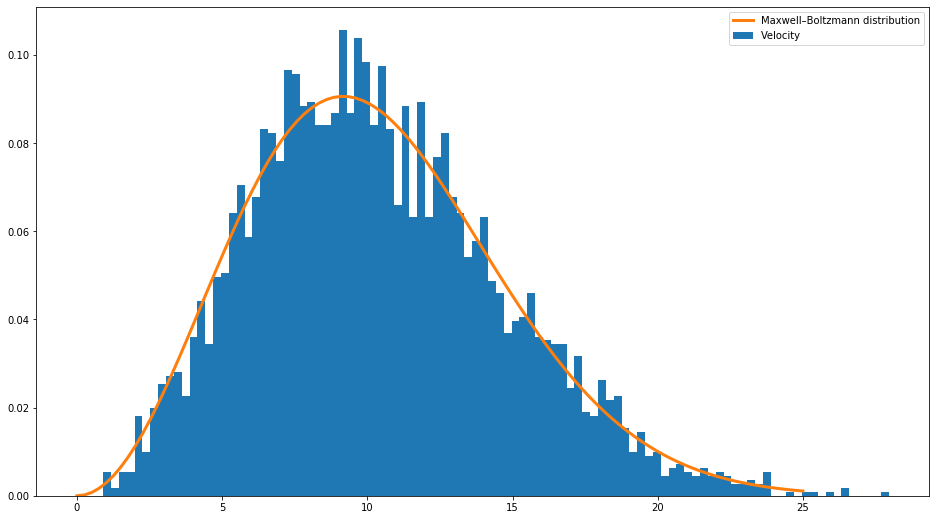

In [88]:
maxwell = stats.maxwell
data = maxwell.rvs(loc=0, scale=1, size=10000)
params = maxwell.fit(df['v'], floc=0)
plt.hist(df['v'], bins=100, density=True, label='Velocity')
x = np.linspace(0, 25, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3, label = "Maxwell–Boltzmann distribution")
plt.legend()
plt.show()